# SOK-1006 v23
## Innleveringsoppgave 2
### Analyse av en merverdiavgift ("ad valorem tax")

Her skal vi se på virkningen av å ilegge en vare en skatt i henhold til dens verdi (merverdiavgift). Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p_k\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p_s\tag{2}
\end{equation}

Kjøpere betaler $p_k$ og selgere får $p_s$. Prisen som selgere får er det som konsumenter betaler minus mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -100 + 4.3 p_k(1-t)\tag{3}
\end{equation}



In [1]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [2]:
# Etterspørsel i likning (1)

def x_d(p):
    return 500 - 3.2*p

#Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)


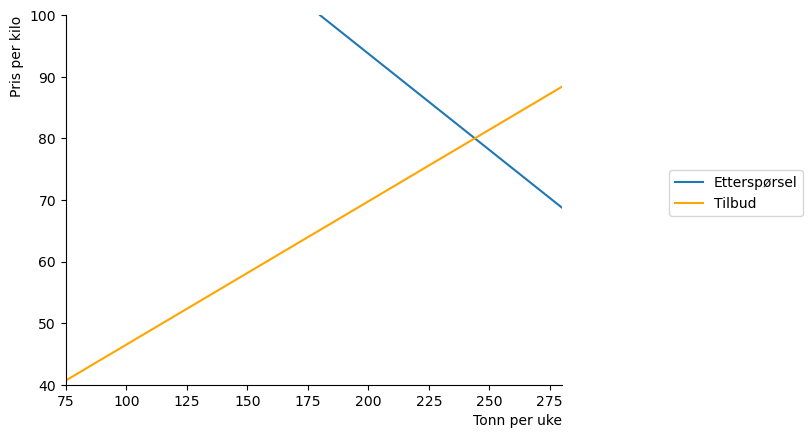

In [3]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, color="orange", label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

   
1. Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).
2. Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.
3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.
4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?


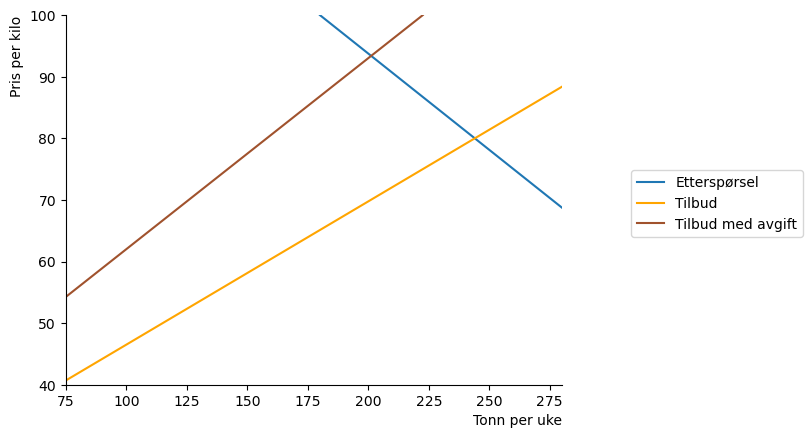

In [4]:
ax.plot(x_s(p_num, .25),p_num, color="sienna", label='Tilbud med avgift')
ax.legend(bbox_to_anchor=(1.5,0.6));
fig

Grunnen til at den er brattere er at mva er en prosentvis avgift.

In [5]:
x,p,t=sp.symbols('x p t', positive=True, real=True)

# betingelser for likevekt

eq_cond=sp.Eq(x_d(p),x_s(p,t))
eq_cond

Eq(500 - 3.2*p, 4.3*p*(1 - t) - 100)

In [6]:
p_eq=sp.solve(eq_cond,p)
p_eq[0]

-6000.0/(43.0*t - 75.0)

In [7]:
x_eq=x_s(p_eq[0],t)
x_eq

-25800.0*(1 - t)/(43.0*t - 75.0) - 100

In [8]:
# Bruk sp.lambdify for å gjøre om sympy til numpy array

# Likevektspris som funksjon av t

p_eq_fn=sp.lambdify(
    (t), 
    p_eq[0]
)

p_eq_fn(t)

-6000.0/(43.0*t - 75.0)

In [9]:
# Likevektskvantum som funksjon av t

x_eq_fn=sp.lambdify(
    (t), 
    x_eq
)

x_eq_fn(t)

-100 + (25800.0*t - 25800.0)/(43.0*t - 75.0)

In [10]:
# Kvantum omsatt med avgift på t=0
x_eq_fn(0)

244.0

In [11]:
# Kvantum omsatt med avgift på t=.25
x_eq_fn(.25)

201.16731517509726

In [12]:
kvantum_uten = round(x_eq_fn(0),4)
kvantum_uten

244.0

In [13]:
kvantum_mva = round(x_eq_fn(.25),2)
kvantum_mva

201.17

In [14]:
# tapet av kvantum med mva
kvantum_tap = kvantum_uten - kvantum_mva
kvantum_tap

42.83000000000001

In [15]:
# prisen uten mva
p_uten = round(p_eq_fn(0),2)
p_uten

80.0

In [16]:
# prisen med mva
p_mva = round(p_eq_fn(.25),2)
p_mva

93.39

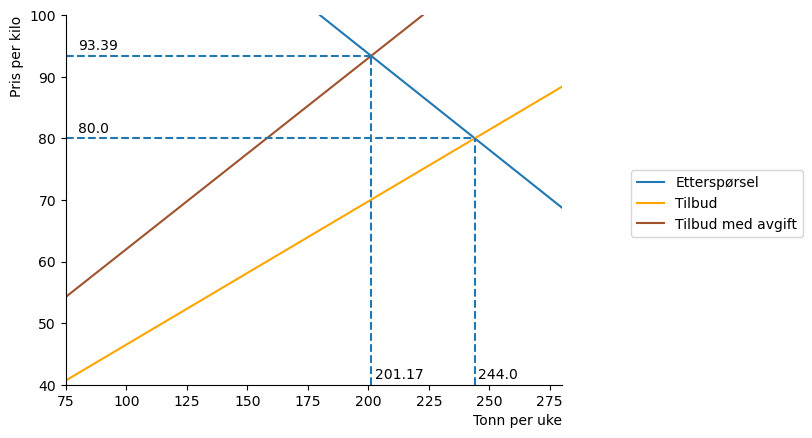

In [17]:
ax.vlines(x_eq_fn(0),40, 80, linestyles='dashed', clip_on=False)
ax.vlines(x_eq_fn(.25),40, 93.39, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0),75,244, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(.25),75,201.16, linestyles='dashed', clip_on=False)

ax.annotate(kvantum_uten, xy=(kvantum_uten+1.5,41), annotation_clip=False)
ax.annotate(kvantum_mva, xy=(kvantum_mva+1.5,41), annotation_clip=False)
ax.annotate(p_uten, xy=(80, p_uten+1), annotation_clip=False)
ax.annotate(p_mva, xy=(80, p_mva+1), annotation_clip=False)

fig

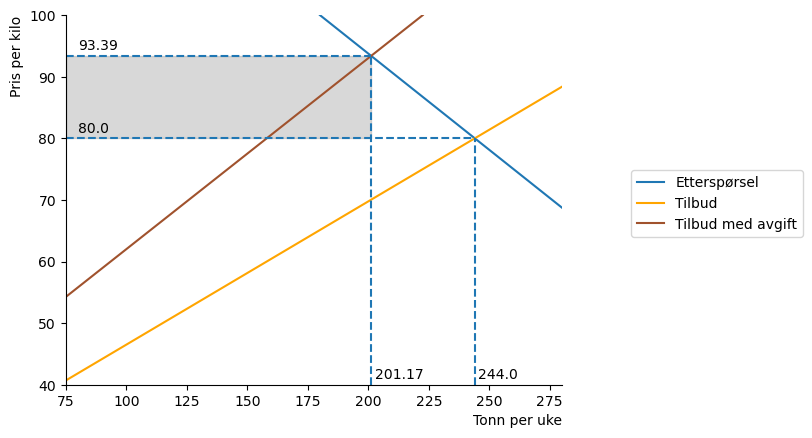

In [19]:
q=np.linspace (75, x_eq_fn(.25), 100)

ax.fill_between(q,p_mva,80, color = "gray",alpha = 0.3)

fig

Det grå er det staten tar i avgift.
I dette tilfelle betales hele avgiften av konsumenten.